## Gaussian Process Regression
### 1. Introduction
### 2. Data Preparation

In [61]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF 

In [62]:
# pandas will automatically convert the 'NaN' values to np.nan
red_ball_coordinates = pd.read_csv('../data/red_ball_coordinates_128px_017.csv', delimiter=',')
red_ball_coordinates

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,NaN,NaN,NaN,NaN,NaN,NaN,52.880000,83.240000,NaN,NaN,59.0,69.5,68.666667,118.333333
1,NaN,NaN,NaN,NaN,NaN,NaN,51.041667,83.125000,NaN,NaN,NaN,NaN,68.428571,118.571429
2,NaN,NaN,NaN,NaN,125.882353,91.411765,49.833333,82.333333,NaN,NaN,NaN,NaN,68.428571,118.571429
3,NaN,NaN,NaN,NaN,124.647059,89.617647,47.416667,81.916667,NaN,NaN,NaN,NaN,68.428571,118.571429
4,40.500000,127.500000,84.500000,127.500000,123.673913,88.739130,45.909091,81.787879,NaN,NaN,NaN,NaN,68.428571,118.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,82.675000,113.975000,12.000000,72.000000,55.000000,23.750000,84.764706,66.970588,NaN,NaN,60.5,69.0,68.500000,119.500000
1869,81.043478,116.130435,12.000000,72.000000,55.000000,23.750000,82.909091,68.666667,NaN,NaN,60.5,69.0,68.500000,119.500000
1870,77.923077,119.846154,120.285714,123.333333,55.000000,23.750000,79.690476,71.452381,NaN,NaN,60.5,69.0,68.500000,119.500000
1871,79.543478,118.347826,113.777778,118.666667,55.000000,23.750000,81.096774,70.322581,NaN,NaN,60.5,69.0,68.500000,119.500000


In [63]:
xyz_coordinates = pd.read_csv('../data/positions_xyz_128px_017.csv', delimiter=',')
xyz_coordinates

,x,y,z
0,6.000000,4.000000,14.00000
1,6.000000,7.000000,14.00000
2,6.000000,7.000000,14.00000
3,6.000000,7.000000,14.00000
4,6.169909,6.993336,14.07999
...,...,...,...
1872,3.642321,5.456923,12.76173
1873,3.751164,5.628386,12.83502
1874,3.867227,5.792615,12.90916
1875,3.990135,5.948880,12.98405


In [64]:
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
# remove the first 4 rows
xyz_coordinates = xyz_coordinates.iloc[4:]
xyz_coordinates

,x,y,z
4,6.169909,6.993336,14.07999
5,6.339272,6.973373,14.15992
6,6.507547,6.940200,14.23974
7,6.674192,6.893964,14.31939
8,6.838673,6.834871,14.39882
...,...,...,...
1872,3.642321,5.456923,12.76173
1873,3.751164,5.628386,12.83502
1874,3.867227,5.792615,12.90916
1875,3.990135,5.948880,12.98405


### 3. Data Preprocessing

In [65]:
# split into features and target
X = red_ball_coordinates
# remove the first 3
y = xyz_coordinates

In [66]:
from sklearn.impute import SimpleImputer
# scale the features and the target
from sklearn.preprocessing import StandardScaler

#### 3.1. Impute the NaN values with mean SimpleImputer

In [67]:
imputer = SimpleImputer(strategy='mean')
X_imputed_mean = imputer.fit_transform(X)
y_imputed_mean = imputer.fit_transform(y)

#### 3.2. Impute the NaN values with median SimpleImputer

In [68]:
imputer = SimpleImputer(strategy='median')
X_imputed_median = imputer.fit_transform(X)
y_imputed_median = imputer.fit_transform(y)

### 3.3. Impute the NaN values with KNNImputer

In [69]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputed_knn = imputer.fit_transform(X)

### 4. Gaussian Process Regression

In [70]:
total_samples = len(X_imputed_mean)
train_samples = int(0.8 * total_samples)

# Split the data
X_train = X_imputed_mean[:train_samples]
y_train = y[:train_samples]

X_test = X_imputed_mean[train_samples:]
y_test = y[train_samples:]

In [71]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

In [72]:
X_scaled_train = scaler_X.fit_transform(X_train)
y_scaled_train = scaler_y.fit_transform(y_train)

gp.fit(X_scaled_train, y_scaled_train)

C:\Users\xande\venv\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=20)

### 5. Predictions

In [73]:
X_test_scaled = scaler_X.transform(X_test)
y_pred, sigma = gp.predict(X_test_scaled, return_std=True)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[ 6.0705283 ,  3.98127413, 14.12290658],
       [ 6.0705283 ,  3.98127413, 14.12290658],
       [ 6.0705283 ,  3.98127413, 14.12290658],
       ...,
       [ 6.0705283 ,  3.98127413, 14.12290658],
       [ 6.0705283 ,  3.98127413, 14.12290658],
       [ 6.0705283 ,  3.98127413, 14.12290658]])

### 6. Conclusion

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'R2 Squared: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')    

R2 Squared: -0.036314196247782725
MSE: 4.566026717257715
MAE: 1.9279173611470117


#### 6.1 Visualize the results
#### 6.1.1 3D Visualization of the predicted ball trajectory

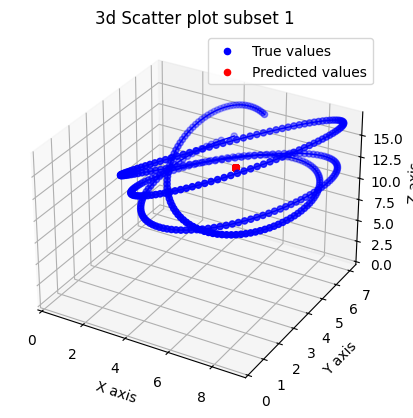

In [75]:
from utils.plot_maker_gaussian_process import plot_maker_3d
import numpy as np

plot_maker_3d(np.array(y_test), np.array(y_pred), '3d Scatter plot subset 1')

In [76]:
y_pred = np.array(y_pred)
sigma = np.array(sigma)
y_test = np.array(y_test)

In [77]:
# Get the data for each dimension (x, y, z)
y_pred_x, y_pred_y, y_pred_z = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
sigma_x, sigma_y, sigma_z = sigma[:, 0], sigma[:, 1], sigma[:, 2]
y_test_x, y_test_y, y_test_z = y_test[:, 0], y_test[:, 1], y_test[:, 2]

#### 6.1.2 Gaussian Process In Time with Covariance For Each Dimension

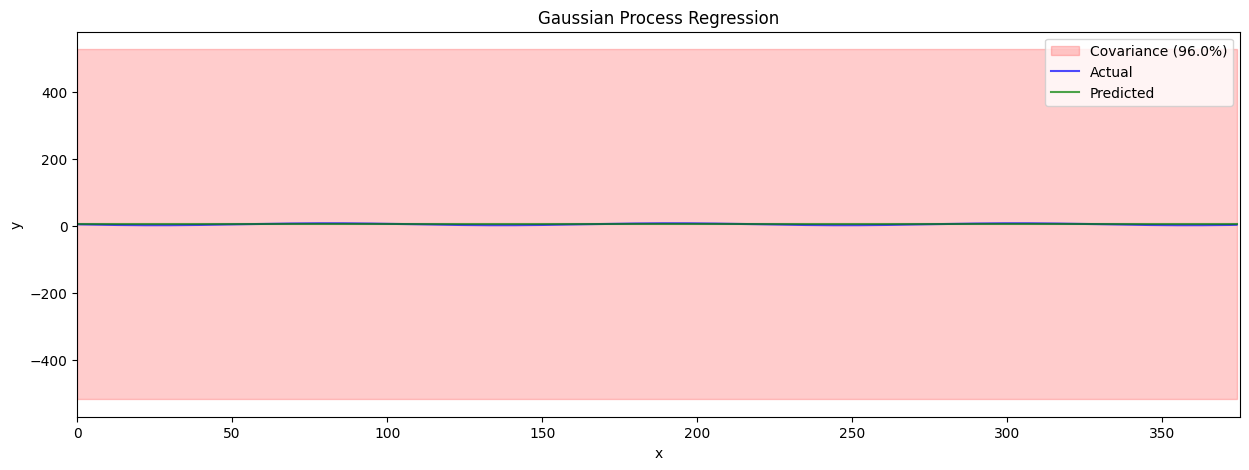

In [78]:
from utils.plot_maker_gaussian_process import gaussian_process_plot
# for the x dimension
gaussian_process_plot(y_test_x, y_pred_x, sigma_x)

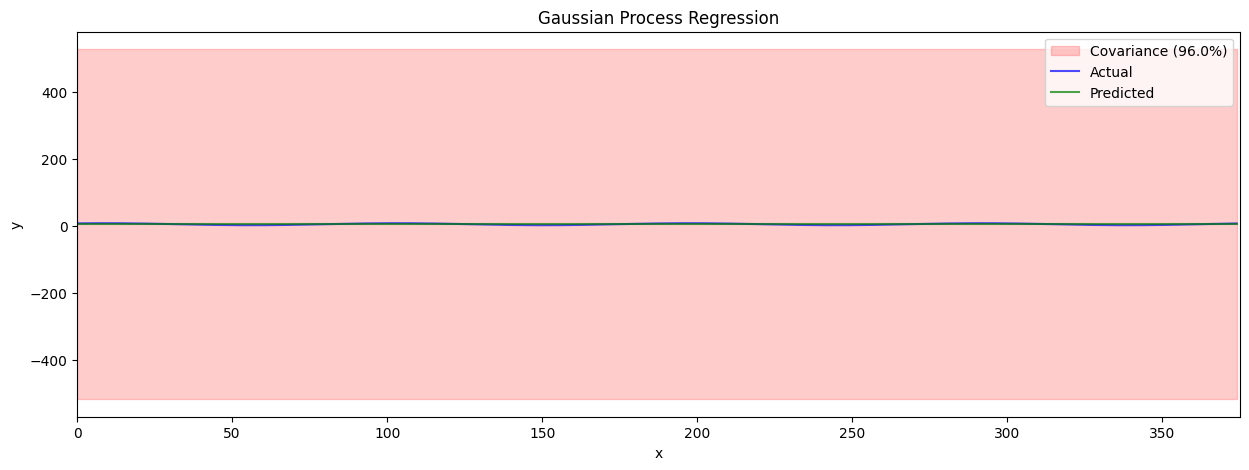

In [79]:
# for the y dimension
gaussian_process_plot(y_test_y, y_pred_y, sigma_y)

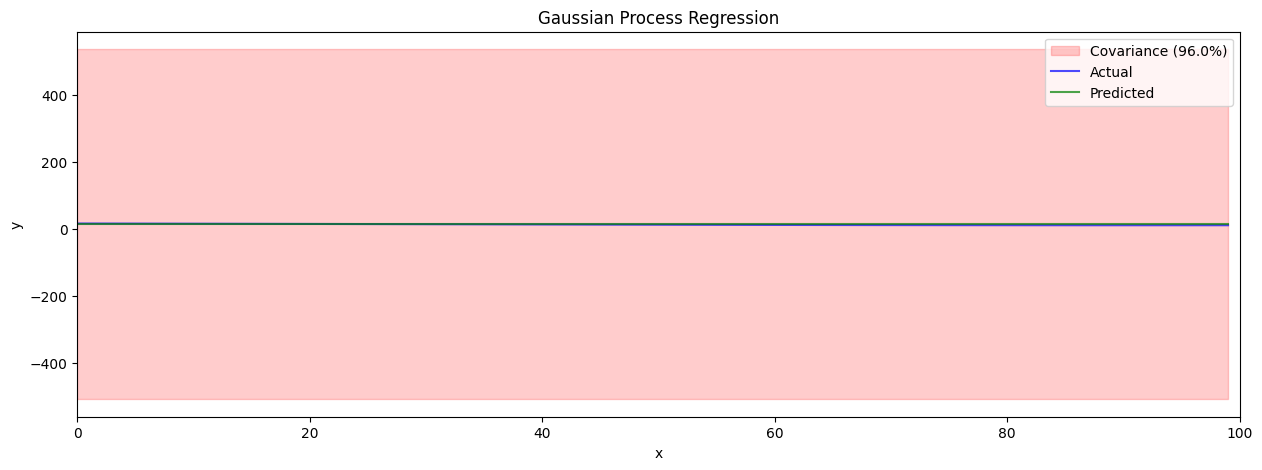

In [80]:
# for the z dimension
gaussian_process_plot(y_test_z[:100], y_pred_z[:100], sigma_z[:100])